# 案例：《转角遇到爱》背后的数据

## 技术实现

### 数据脱敏
《转角遇到爱》中的一大特点就是对文本数据的处理，其中进行了隐私内容脱敏处理。这个过程的主要目标就是，这几种信息合在一起，不让涉及到的相亲男女周围的人察觉到他们是谁。比如，有个人是“市级医院XX主任” ，当时大家觉得已经去敏了，但吕老师就觉得，这条信息和其他信息放在一起，他周围人的可能一下就会认出来所以就又做了一步“医院科主任”这样范围就更模糊了。

这就是我们常说的数据脱敏。数据脱敏是指对某些敏感信息通过脱敏规则进行数据的变形，实现敏感隐私数据的可靠保护。在涉及客户安全数据或者一些商业性敏感数据的情况下，在不违反系统规则条件下，对真实数据进行改造并提供测试使用，如身份证号、手机号、卡号、客户号等个人信息都需要进行数据脱敏。这样就可以在开发、测试和其它非生产环境以及外包环境中安全地使用脱敏后的真实数据集。

如果大家对数据脱敏的做法感兴趣，或者想了解如何进行数据脱敏处理不妨参考下面的链接。
数据脱敏的6种方案_胖大海-CSDN博客_数据脱敏的常用方法：https://blog.csdn.net/u010517268/article/details/112864274

### Swiper
我们经常在看很多H5的数据新闻时，会看到滑动滚播的效果，这种效果很显然也在《转角遇到爱》中获得了实现。这其实和一款基于JAVA SCRIPT的插件有关。这个小魔法就是Swiper。

swiper是一款轻量级的轮播图插件，不仅支持pc端更是为移动端而生，用它可以快速地做出一个轮播图，或者扩展使其做出复杂的轮播效果。Swiper常用于移动端网站的内容触摸滑动。Swiper能实现触屏焦点图、触屏Tab切换、触屏轮播图切换等常用效果。Swiper开源、免费、稳定、使用简单、功能强大，是架构移动终端网站的重要选择！如果想了解如何使用Swiper实现自己想要的效果，可以参考以下的链接。

Swiper中文网-轮播图幻灯片js插件,H5页面前端开发：https://swiper.com.cn/

## 数据新闻的另一种视角与实现

这个作品向我们诠释了数据新闻的另一种可能。这也就迎合了该作品的主创人的初期想法。“数据新闻，不一定要是非常数字化的东西，其实在我们的生活当中有很多可能被我们忽略到，但是放在一起就是一个很有趣的数据点，大家可能会觉得原来这个题可以这样子做，用数据的方法去做。”邹熳云分享道。这其实给我们做数据新闻的时候也提供了另一种思考的路径，什么样的东西可以成为选择数据新闻的选题，又可以怎样做？这些都是再去省思的点。



In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as plt

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号, 注意['SimHei']对应这句不行.

In [20]:
!dir D:\cc\CC\lesson\02

 驱动器 D 中的卷是 Data
 卷的序列号是 92BF-9CDC

 D:\cc\CC\lesson\02 的目录

2023/06/05  12:54    <DIR>          .
2023/05/30  10:38    <DIR>          ..
2023/05/31  00:12    <DIR>          .ipynb_checkpoints
2023/05/30  10:38    <DIR>          02-1
2023/05/30  12:09    <DIR>          02-2
2023/05/30  14:33    <DIR>          02-3
2023/05/30  21:21    <DIR>          02-4
2023/05/30  21:32    <DIR>          02-5
2023/05/31  00:21           203,763 db_new.csv
2023/05/31  00:12           277,437 example-1.ipynb
2023/06/05  12:54             4,384 example-2.ipynb
2023/05/30  22:30           909,860 MPs.expenses.claims.Jul-Dec.2009.xlsx
2023/05/30  23:49             5,120 sankey_base.html
2023/05/30  23:22            15,263 sankey_mps.html
               6 个文件      1,415,827 字节
               8 个目录 31,862,820,864 可用字节


In [23]:
df = pd.read_csv('db_new.csv')
df.head()

,id,Gender.self,Year.self,Born.self,Hukou.self,Live.self,Marriage.self,Height.self,Weight.self,Looking.self,...,Hobby.wanted,Edu.min.wanted,Edu.min.n.wanted,Job.wanted,Salary.min.wanted,Apt.wanted,Family.wanted,Other.wanted,interesting.wanted,Similar.wanted
0,1,女性,1987,N,N,N,N,1.65,N,皮肤白，大眼睛,...,无不良嗜好,N,N,稳定,N,有婚房,N,81年不考虑。家境较好，有独立婚房。靠近长宁区,81年不考虑,N
1,2,男性,1983,浙江,有上海户口,N,N,1.83,N,N,...,N,本科,4,N,N,要有婚房,单亲家庭勿扰,89年不要，独生女，家庭条件相当,89年不要,Y
2,3,男性,1970,上海,有上海户口,N,单身,1.75,N,N,...,N,N,N,白领工作,N,N,N,条件相当,白领工作,Y
3,4,男性,1983,上海,有上海户口,上海,N,1.8,N,N,...,N,本科,4,稳定工作,N,N,N,N,本分,N
4,5,女性,1988,上海,有上海户口,上海,N,1.69,N,清纯、秀丽、有气质,...,不抽烟,本科,4,N,N,N,N,条件相当,不抽烟,Y


In [24]:
df['Age'] = 2018 - df['Year.self']

## 1.直方图

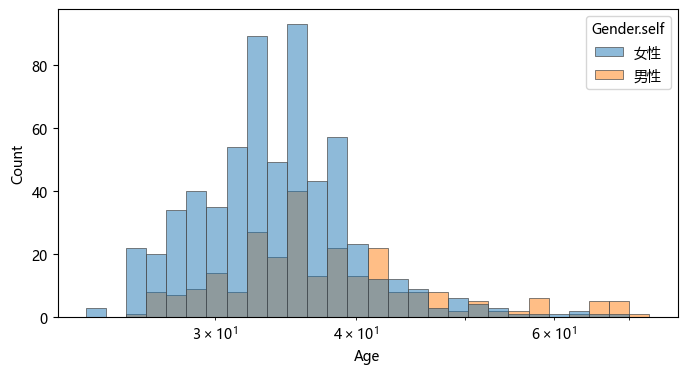

In [25]:
plt.figure(figsize =(8, 4), dpi = 100)

sns.histplot(
    df,
    x="Age", hue="Gender.self",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
);

## 2.小提琴图

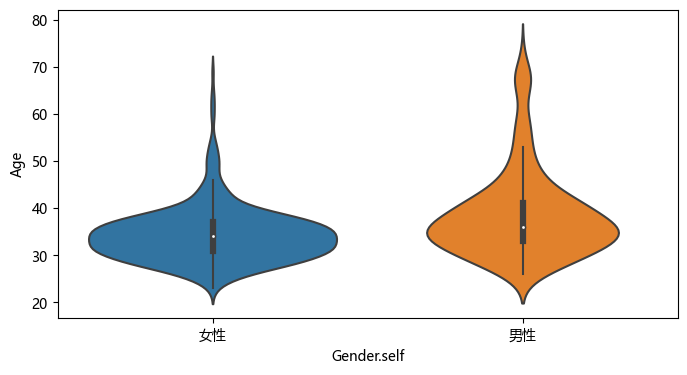

In [26]:
plt.figure(figsize =(8, 4), dpi = 100)
sns.violinplot(x="Gender.self", y="Age", data=df);
# 使用Seaborn库的violinplot函数绘制小提琴图

In [31]:
df['Height.self'].unique()

array(['1.65', '1.83', '1.75', '1.8', '1.69', '1.7', '1.6', '1.74',
       '1.72', '1.71', 'N', '1.61', '1.76', '1.59', '1.78', '1.66',
       '1.68', '1.57', '1.62', '1.73', '1.63', '1.81', '1.84', '1.58',
       '1.64', '1.77', '1.85', '1.67', '1.82', '1.56', '1.55', '1.48',
       '1.86', '1.87'], dtype=object)

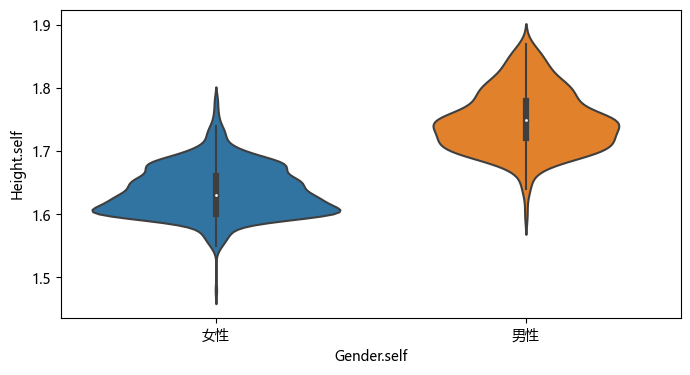

In [32]:
df['Height.self'] = pd.to_numeric(df['Height.self'], errors='coerce') #将N替换为NaN并将列转换为数值类型
plt.figure(figsize =(8, 4), dpi = 100)
sns.violinplot(x="Gender.self", y="Height.self", data=df);

## 3.查询列表

In [33]:
df['Hukou.self'].unique() # 返回该列中的唯一值（了解该列中存在哪些不同的值）

array(['N', '有上海户口', '没有上海户口'], dtype=object)

In [34]:
df['Hukou.self'].value_counts()

Hukou.self
有上海户口     421
N         409
没有上海户口     44
Name: count, dtype: int64

In [42]:
# Looking.self.dummy可以被视为对Looking.self的一种编码方式，其中非"N"的值用1表示，"N"的值用0表示
df['Looking.self.dummy'] = [1 if i != 'N' else 0 for i in df['Looking.self']]
df['Looking.wanted.dummy'] = [1 if i != 'N' else 0 for i in df['Looking.wanted']]
df['Personality.self.dummy'] = [1 if i != 'N' else 0 for i in df['Personality.self']]
df['Family.self.dummy'] = [1 if i != 'N' else 0 for i in df['Family.self']]
df['Hobby.self.dummy'] = [1 if i != 'N' else 0 for i in df['Hobby.self']]
df['Other.self.dummy'] = [1 if i != 'N' else 0 for i in df['Other.self']]
df['interesting.self.dummy'] = [1 if i != 'N' else 0 for i in df['interesting.self']]
df['Hukou.wanted.dummy'] = [1 if i != 'N' else 0 for i in df['Hukou.wanted']]

In [43]:
['id', 'Gender.self', 'Year.self', 'Born.self', 'Hukou.self',
       'Live.self', 'Marriage.self', 'Height.self', 'Weight.self',
       'Looking.self', 'Personality.self', 'Edu.self', 'Eduno.self',
       'top.self', 'Abroad.self', 'Major.self', 'Job.self', 'Salary.self',
       'Apt.self', 'Family.self', 'Hobby.self', 'Other.self',
       'interesting.self', 'Gender.wanted', 'Year.max.wanted',
       'Year.min.wanted', 'Year.text.wanted', 'Hukou.wanted', 'Live.wanted',
       'Marriage.wanted', 'Height.min.wanted', 'Looking.wanted',
       'Personality.wanted', 'Hobby.wanted', 'Edu.min.wanted',
       'Edu.min.n.wanted', 'Job.wanted', 'Salary.min.wanted', 'Apt.wanted',
       'Family.wanted', 'Other.wanted', 'interesting.wanted',
       'Similar.wanted']

['id',
 'Gender.self',
 'Year.self',
 'Born.self',
 'Hukou.self',
 'Live.self',
 'Marriage.self',
 'Height.self',
 'Weight.self',
 'Looking.self',
 'Personality.self',
 'Edu.self',
 'Eduno.self',
 'top.self',
 'Abroad.self',
 'Major.self',
 'Job.self',
 'Salary.self',
 'Apt.self',
 'Family.self',
 'Hobby.self',
 'Other.self',
 'interesting.self',
 'Gender.wanted',
 'Year.max.wanted',
 'Year.min.wanted',
 'Year.text.wanted',
 'Hukou.wanted',
 'Live.wanted',
 'Marriage.wanted',
 'Height.min.wanted',
 'Looking.wanted',
 'Personality.wanted',
 'Hobby.wanted',
 'Edu.min.wanted',
 'Edu.min.n.wanted',
 'Job.wanted',
 'Salary.min.wanted',
 'Apt.wanted',
 'Family.wanted',
 'Other.wanted',
 'interesting.wanted',
 'Similar.wanted']

## 4.列联表分析

In [44]:
pd.crosstab(df['Gender.self'],df['Looking.self.dummy'],margins=True)

Looking.self.dummy,0,1,All
Gender.self,,,
女性,406,212,618
男性,222,34,256
All,628,246,874


In [45]:
pd.crosstab(df['Gender.self'],df['Looking.self.dummy'],margins=True, normalize='index')
# 参数normalize='index'表示对交叉表进行按行标准化。换句话说，它计算了每行中各个单元格的相对频率或比例。

Looking.self.dummy,0,1
Gender.self,,
女性,0.656958,0.343042
男性,0.867188,0.132812
All,0.718535,0.281465


In [51]:
import numpy as np
from scipy import stats

alist = np.array(pd.crosstab(df['Gender.self'],df['Personality.self.dummy'],margins=False)).tolist()
print(alist)
# 步骤1：pd.crosstab(df['Gender.self'],df['Looking.self.dummy'],margins=False) 计算交叉表
# 步骤2：np.array()将返回的交叉表DataFrame转换为NumPy数组
# 步骤3：.tolist()将NumPy数组转换回Python列表形式

[[371, 247], [173, 83]]
Test Statistic: 4.070440019813376
 p-value: 0.04363990497274837
 Degrees of Freedom: 1

[[384.6590389 233.3409611]
 [159.3409611  96.6590389]]


In [52]:
# 卡方检验
chi2, p, ddof, expected = stats.chi2_contingency( alist )
# 这个函数返回卡方值（chi2）、p值（p）、自由度（ddof）和预期频数（expected）

msg = "Test Statistic: {}\n p-value: {}\n Degrees of Freedom: {}\n"
print( msg.format( chi2, p, ddof ) )
print( expected )

Test Statistic: 4.070440019813376
 p-value: 0.04363990497274837
 Degrees of Freedom: 1

[[384.6590389 233.3409611]
 [159.3409611  96.6590389]]
